# Practical (4 hours): Comprehensive Application

## Datasets Used

- **Gapminder dataset**  
    *Variables:* GDP per capita & population (skewed)  
    *File:* `Gapminder.csv`

- **World Bank CO₂ emissions dataset**  
    *Variable:* Highly skewed CO₂ emissions  
    *File:* `CO2_Data.csv`

- **Titanic dataset**  
    *Purpose:* Outlier handling  
    *File:* `Titanic.csv`

- **Cars dataset**  
    *Type:* Built-in  
    *Variables:* Speed, Distance

### Example 1: Logarithmic Transformation  
**Datasets:**  
- **Income** (Gapminder)  
- **Horsepower** (Cars dataset)

---

#### By Hand

- Compute the logarithm for GDP per capita of 5 countries.
- For the Cars dataset, calculate values such as log(4), log(7), etc.
- For zero-inflated data, use the transformation:  
    $$ \log(1 + x) $$

---

#### In Excel

- **Logarithm:**  
    `=LN(cell)` for natural log  
- **Log1p (log(1+x)):**  
    `=LN(1+cell)`

---


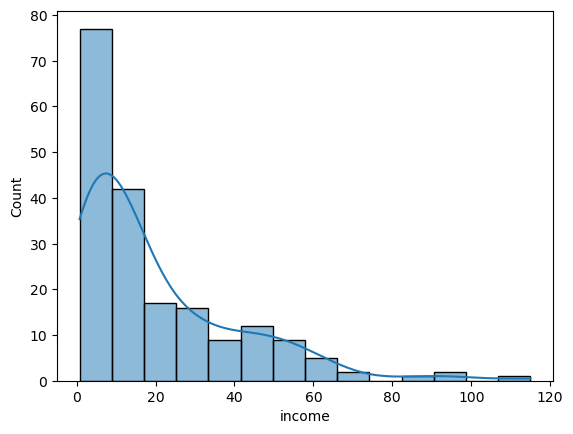

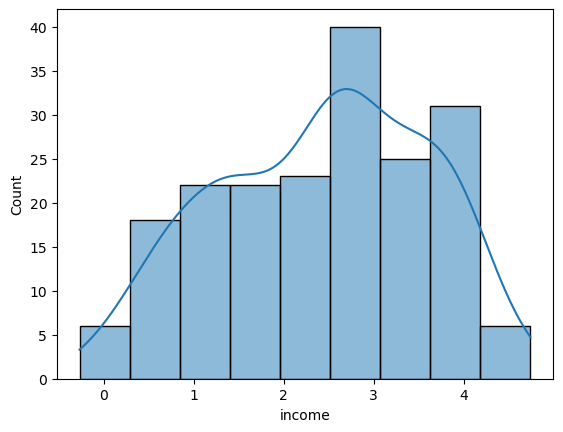

0    165
1     71
2    140
3    150
4     63
Name: horsepower, dtype: int64
0    5.105945
1    4.262680
2    4.941642
3    5.010635
4    4.143135
Name: horsepower, dtype: float64
0    5.111988
1    4.276666
2    4.948760
3    5.017280
4    4.158883
Name: horsepower, dtype: float64


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Gapminder GDP
df = pd.read_csv("gapminder.csv")
income = df["income"]
sns.histplot(income, kde=True); plt.show()
sns.histplot(np.log(income), kde=True); plt.show()

# Cars dataset
from sklearn.datasets import fetch_openml
cars = fetch_openml(name="cars1", version=1, as_frame=True).frame
print(cars["horsepower"].head())
print(np.log(cars["horsepower"].head()))
print(np.log1p(cars["horsepower"].head()))


### Example 2: Square Root Transformation (CO₂ Emissions)

#### By Hand
- Calculate \( \sqrt{x} \) for selected countries.
- Compare variance before and after transformation.

#### Excel
- Use: `=SQRT(cell)` for emissions values.

#### Python

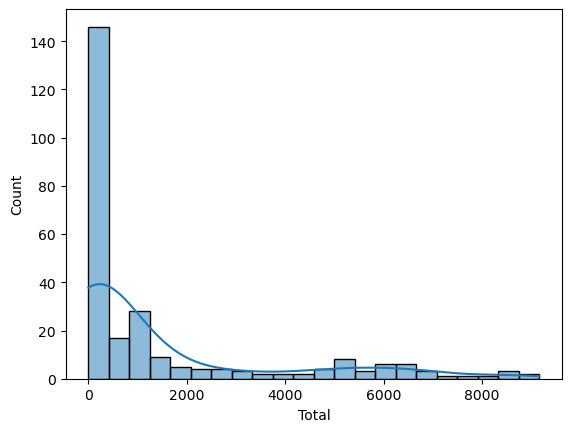

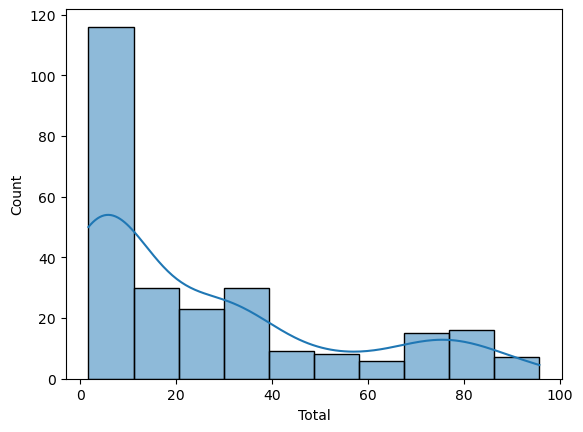

In [7]:
df2 = pd.read_csv("global.csv")
emissions = df2["Total"]
sns.histplot(emissions, kde=True); plt.show()
sns.histplot(np.sqrt(emissions), kde=True); plt.show()

### Example 3: Reciprocal Transformation (Cars Stopping Distance)

**By Hand:**  
- Compute \( \frac{1}{x} \) for the first 5 stopping distances (e.g., \( \frac{1}{2} \), \( \frac{1}{10} \), \( \frac{1}{4} \)).

**Excel:**  
- Use: `=1/cell`

**Purpose:**  
- The reciprocal transformation is useful for reducing the impact of large values and can help normalize right-skewed data, especially when values are all positive and nonzero.

**Note:**  
- Ensure there are no zero values before applying the reciprocal transformation, as division by zero is undefined.

In [9]:
cars.head()

,MPG,cylinders,cubicInches,horsepower,weightLbs,time-to-sixty,year,class
0,14.0,8,350,165,4209,12,1972,2
1,31.9,4,89,71,1925,14,1980,0
2,17.0,8,302,140,3449,11,1971,2
3,15.0,8,400,150,3761,10,1971,2
4,30.5,4,98,63,2051,17,1978,2


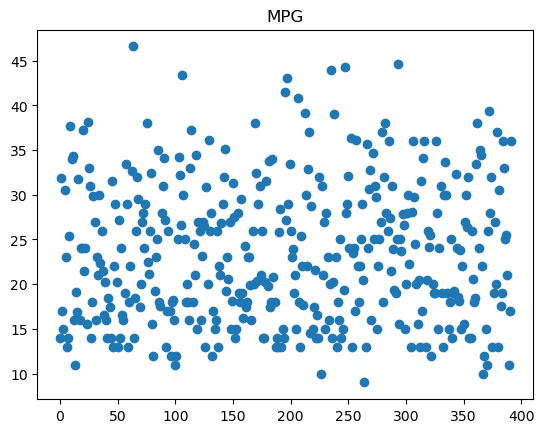

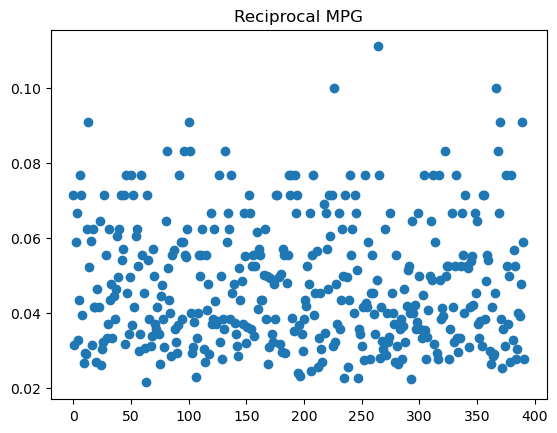

In [14]:
import matplotlib.pyplot as plt


plt.scatter(range(len(cars["MPG"])), cars["MPG"])
plt.title("MPG"); plt.show()

plt.scatter(range(len(cars["MPG"])), 1/cars["MPG"])
plt.title("Reciprocal MPG"); plt.show()


### Example 4: Outlier Handling (Titanic – Fare)

**By Hand:**  
- Identify Q1 (first quartile), Q3 (third quartile), and IQR (interquartile range).
- Mark outliers as values below Q1 – 1.5×IQR or above Q3 + 1.5×IQR.

**Excel:**  
- Compute quartiles and IQR.
- Winsorize or cap extreme values to reduce the effect of outliers.

**Python:**  
- Use `numpy.percentile` or pandas `quantile()` to find Q1, Q3, and IQR.
- Mark or handle outliers using masking, capping, or winsorization.

Original n = 891, Trimmed n = 775, Removed = 116


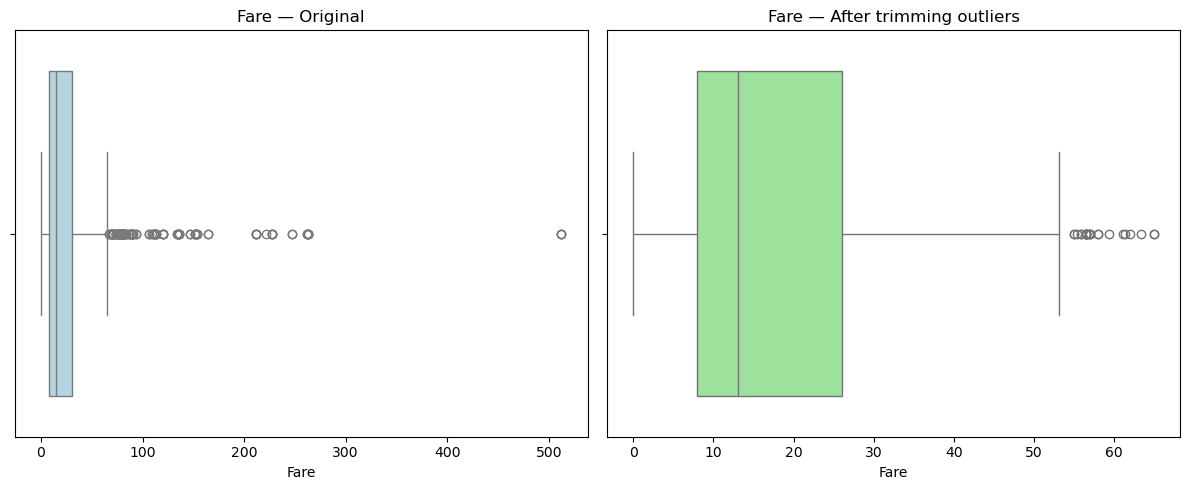

In [ ]:
df3 = pd.read_csv("titanic.csv")
q1, q3 = df3["Fare"].quantile([0.25, 0.75])
iqr = q3 - q1
lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
trimmed = df3[(df3["Fare"] >= lower) & (df3["Fare"] <= upper)]

print(f"Original n = {len(df3)}, Trimmed n = {len(trimmed)}, Removed = {len(df3) - len(trimmed)}")

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
sns.boxplot(x=df3["Fare"], ax=axes[0], color="lightblue")
axes[0].set_title("Fare — Original")
axes[0].set_xlabel("Fare")

sns.boxplot(x=trimmed["Fare"], ax=axes[1], color="lightgreen")
axes[1].set_title("Fare — After trimming outliers")
axes[1].set_xlabel("Fare")

plt.tight_layout()
plt.show()